# MACHINE LEARNING TECHNICS - Classification Algorithms

This is my final assignment for a Python and Machine Learning course I finished. 
The data for this notebook is a modified version from Gulsah Demiryurek´s original published in Kaggle.

Feel free to take a look to her work : __[«Mobile Price Classification with SVM»](https://www.kaggle.com/code/gulsahdemiryurek/mobile-price-classification-with-svm/notebook)__

I limited this notebook to the question asked in my assigment (and my knowledge).

> CONTENTS:

1.1 Reading the Data

1.2. Data Analysis

    1.2.1  Correlations
    1.2.2. Linear Regression 
    1.2.3. Price Prediction
    1.2.4. Residuals
    
1.3. Classification Algorithms

    1.3.1 Support Vector Machine
    1.3.2 Radial Basis Function
    1.3.3 One-vs-the-rest 
    1.3.4 K-Means Clustering
    1.3.5 DBSCAN
    1.3.6 HDBSCAN
    1.3.7 Agglomerative Clustering
    1.3.8 PCA




<a id="1"></a>

## 1. READING THE DATA

In [1]:
import pandas as pd
data=pd.read_csv("data_phones.csv")
print(data.head())
print(data.info())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1954     0            5         1   0       0          24      8   
1           1445     1            5         0   0       0          53      7   
2            509     1            6         1   2       1           9      1   
3           1866     0            5         0  13       1          52      7   
4            775     0           10         0   3       0          46      7   

   mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        187        4  ...      1149   700    16     3          5        1   
1        174        7  ...       836  1099    17     1         20        1   
2         93        5  ...      1224   513    19    10         12        1   
3        185        1  ...       563   373    14     9          3        1   
4        159        2  ...      1864   568    17    15         11        1   

   touch_screen  wifi  price_range  price  
0     

> Dataset as 22 features and 2000 entries. The explanation of the features are given below.

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

price: Price in Euro

In the following table, first 10 entries are shown.

In [2]:
from plotly.figure_factory import create_table
datahead=data.head(10)
datahead=datahead.rename(index=str, columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera",
                                   "four_g":"4G","int_memory":"Internal Memory","m_dep":"Mobile Depth","mobile_wt":"Mobile Weight","n_cores":"Number of cores","pc":"Primary Camera"
                                   ,"px_height":"Pixel Height","px_width":"Pixel Width","ram":"RAM","sc_h":"Screen Height","sc_w":"Screen Width",
                                   "talk_time":"Battery Time","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range","price":"Price"})

table = create_table(datahead,height_constant=40)
table.layout.width=1500
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 8
table.show()

- Let's check if there are any missing values in the dataset.

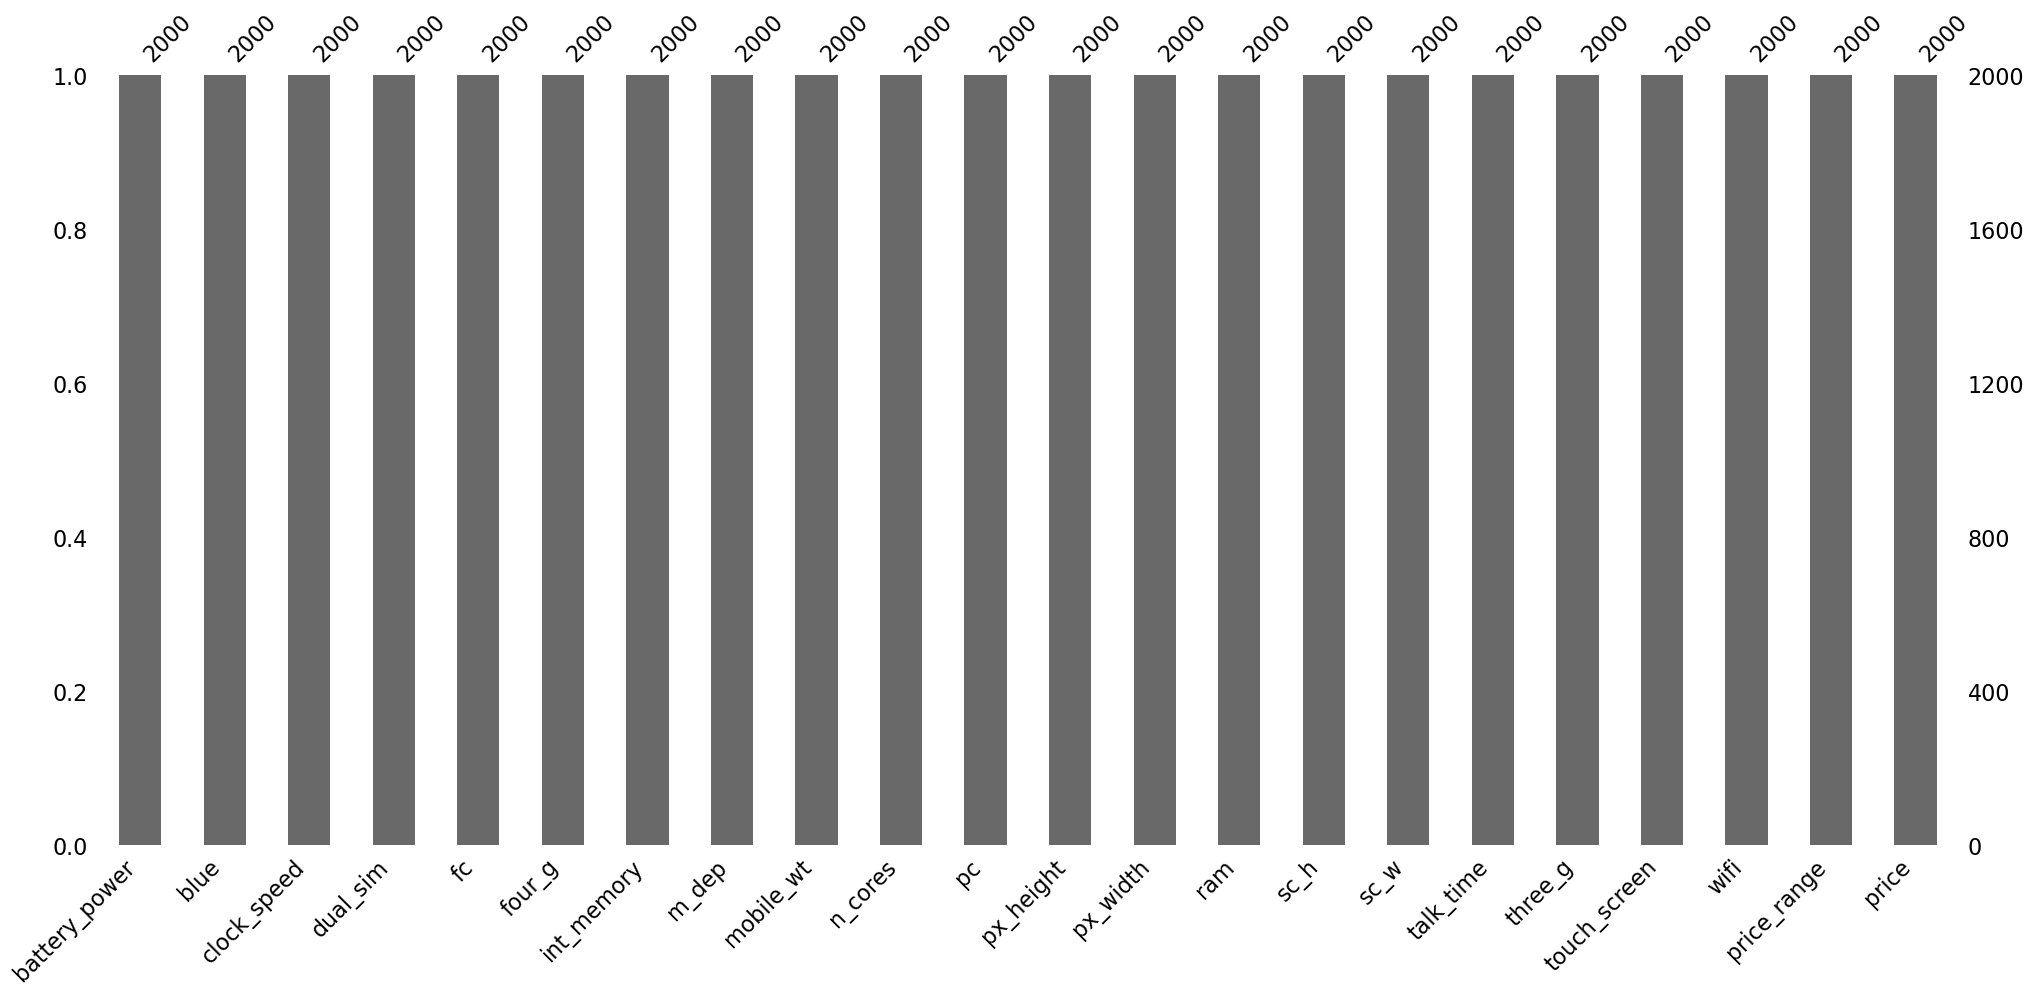

In [3]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

> So far so good, there is no data missing

## 1.2 DATA ANALYSIS

### Correlations

- Correlation values between features.


- Heatmap showing this correlation values.

Text(0.5, 1.0, 'Correlation between features')

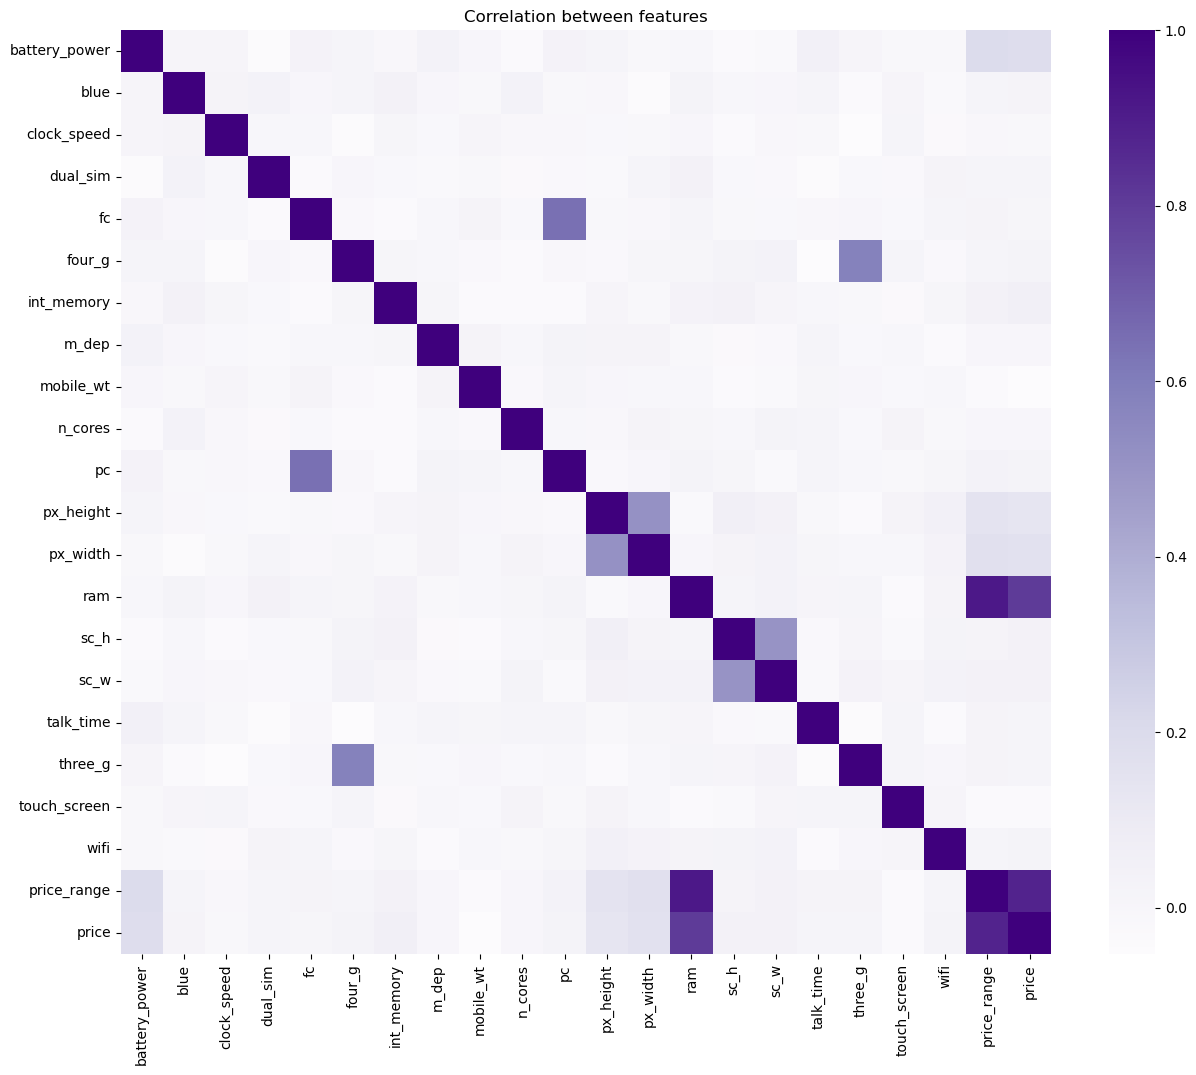

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation between features")

- Sorting Correlation Values related to Price Range

In [5]:
corr=data.corr()
print(corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False))

price_range      1.000000
ram              0.917046
price            0.879636
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


> The 5 features with highest correlation to Price Range are:

        Ram, Price, Battery Power, Pixel Width and Pixel Height

- Using price instead of price_range, now we represent the correlation matrix between price and the other two highest correlation features: ram and battery_power

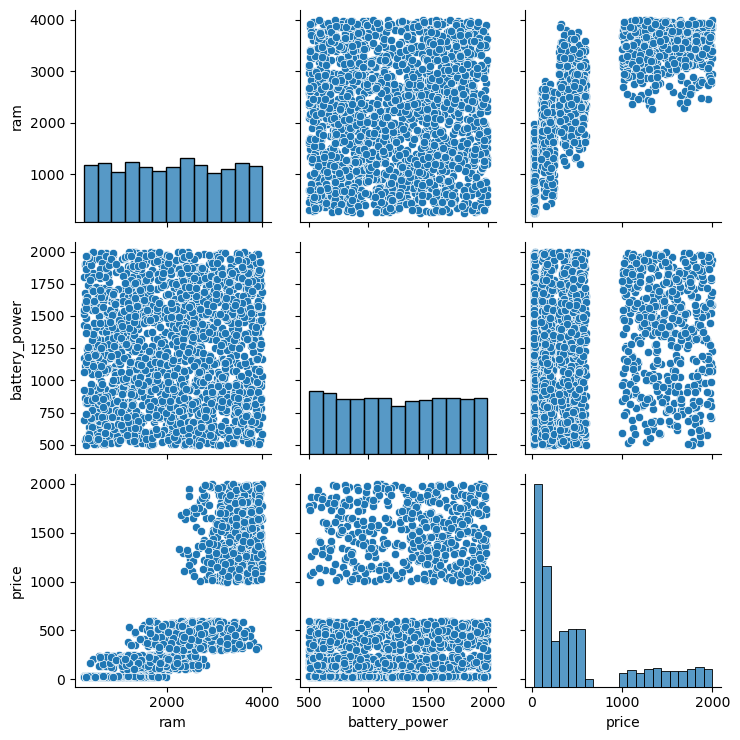

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
col=['ram','battery_power','price']
sns.pairplot(data[col],height=2.5)
plt.tight_layout()


### Lineal Regression

- LINEAL REGRESSION PRICE VS RAM

Regression plot, Regression and determination coefficients 

Coeficiente w1: [[0.44275094]]
Coeficiente w0: [-396.04419171]
Coefficient of determination´s value for training set: 0.644
Coefficient of determination´s value for test set: 0.663


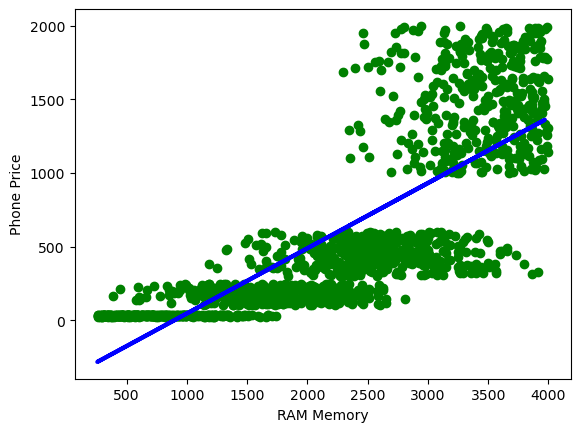

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

ram=np.array([data['ram']])
ram=np.transpose(ram)
price=np.array([data['price']])
price=np.transpose(price)
X_train, X_test, y_train, y_test = train_test_split(ram,price,random_state=20)
lr=LinearRegression().fit(X_train,y_train)
y_pred=lr.predict(X_test)

#Coefficients of regression values 

print("Coeficiente w1:",lr.coef_)
print("Coeficiente w0:",lr.intercept_)

#Plot

plt.scatter(X_train, y_train,  color='green')
plt.xlabel("RAM Memory")
plt.ylabel("Phone Price")
plt.plot(X_test, y_pred, color='blue', linewidth=3)

#Coefficients of determination values 

print("Coefficient of determination´s value for training set:",
      round(lr.score(X_train,y_train),3))
print("Coefficient of determination´s value for test set:",
      round(lr.score(X_test,y_test),3))


> The values of the determination coefficients are not bad (around 0.65), although they are far from 1. In principle, the straight line fits well to certain regions, although the problem is that there are devices with high RAM memories that are sold at very different prices. Therefore, linear fitting does not work well in those regions.



### Price prediction

- If we want to predict the price for a phone with 3100 GB of RAM with the previous lineal regresion. What would that be? 

In [8]:
X_new=[[3100]]
prediction=lr.predict(X_new)
print("The prediction value for a 3100 RAM is:",np.round(prediction,0))


The prediction value for a 3100 RAM is: [[976.]]


### Residuals

- Plot the residuals obtained against the predicted values according to the generated linear regression model (note that mobile phone prices range from approximately €20 to €2,000)


(0.0, 2000.0)

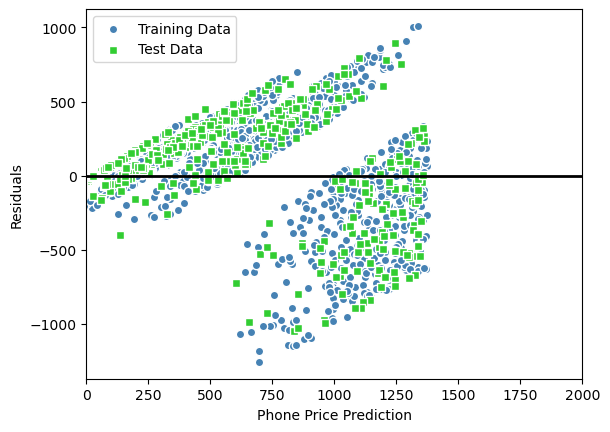

In [9]:
y_train_pred=lr.predict(X_train)
plt.scatter(y_train_pred, y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',
            label='Training Data')
plt.scatter(y_pred, y_pred-y_test,c='limegreen',marker='s',edgecolor='white',
            label='Test Data')
plt.xlabel("Phone Price Prediction") 
plt.ylabel("Residuals") 
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=2000,color='black',lw=2)
plt.xlim([0,2000])


## 1.3 CLASSIFICATION ALGORITHMS

### Support Vector Machine

- Focus next on the ram and battery_power variables, considering price_range as a rating label. Generate a classification using a linear kernel, adding the plot_decisions_regions function to improve the graphical output. Establish the accuracy of the test.



Test Accuracy is: 83.0%


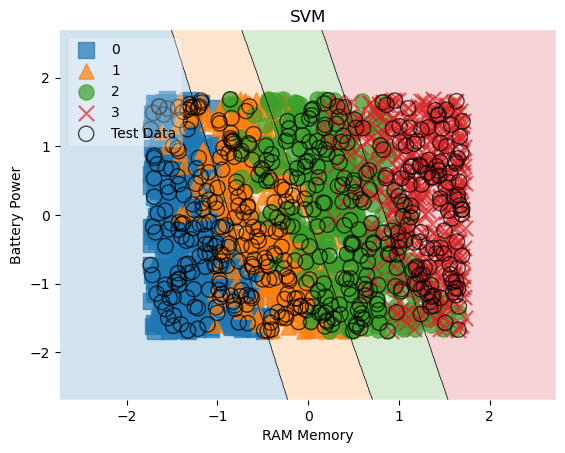

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

data=pd.read_csv("data_phones.csv")
ram=np.array([data['ram']])
ram=np.transpose(ram)
battery_power=np.array([data['battery_power']])
battery_power=np.transpose(battery_power)
price_range=np.array(data['price_range'])
price_range=np.transpose(price_range)

X = np.concatenate((ram,battery_power), axis=1, out=None)

X_train, X_test, y_train, y_test = train_test_split(X,price_range,random_state=20)
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
clf=SVC(kernel="linear",random_state=1,C=1)
clf.fit(X_train_std,y_train)
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

#Getting a better graphic output

scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test Data', 'alpha': 0.7}
plot_decision_regions(X_combined_std,y_combined,clf,legend=2,X_highlight=X_test_std,scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.xlabel('RAM Memory')
plt.ylabel('Battery Power')
plt.title('SVM')
predicciones = clf.predict(X_test_std)
accuracy = accuracy_score(y_true = y_test, y_pred = predicciones, normalize = True)
accuracy=round(accuracy,2)
print("")
print(f"Test Accuracy is: {100*accuracy}%")


### Radial Basis Function


- What would happend to the classification if you apply a RBF with gamma = 20?


Test Accuracy is: 82.0%


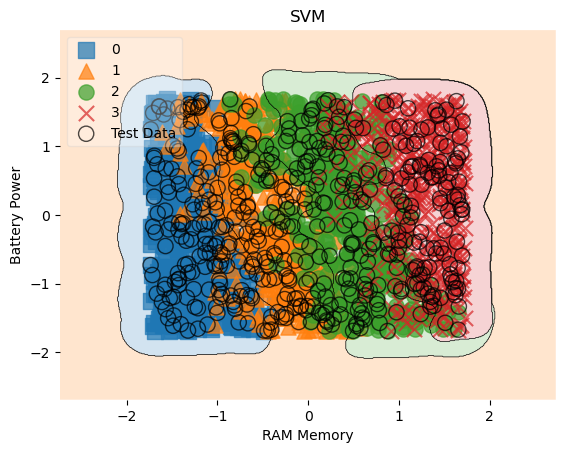

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

data=pd.read_csv("data_phones.csv")
ram=np.array([data['ram']])
ram=np.transpose(ram)
battery_power=np.array([data['battery_power']])
battery_power=np.transpose(battery_power)
price_range=np.array(data['price_range'])
price_range=np.transpose(price_range)

X = np.concatenate((ram,battery_power), axis=1, out=None)

X_train, X_test, y_train, y_test = train_test_split(X,price_range,random_state=20)
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
#this is the line we change
clf=SVC(kernel="rbf",random_state=1,gamma= 20,C=1)
clf.fit(X_train_std,y_train)
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

#Getting a better graphic output

scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test Data', 'alpha': 0.7}
plot_decision_regions(X_combined_std,y_combined,clf,legend=2,X_highlight=X_test_std,scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.xlabel('RAM Memory')
plt.ylabel('Battery Power')
plt.title('SVM')
predicciones = clf.predict(X_test_std)
accuracy = accuracy_score(y_true = y_test, y_pred = predicciones, normalize = True)
accuracy=round(accuracy,2)
print("")
print(f"Test Accuracy is: {100*accuracy}%")

However, accuracy decreases by one percentage point, to 82%.

### One-vs-the-rest

- Apply an OvR strategy to classify the data and determine again the accuracy of the algorithm.



Test Accuracy is: 83.0%


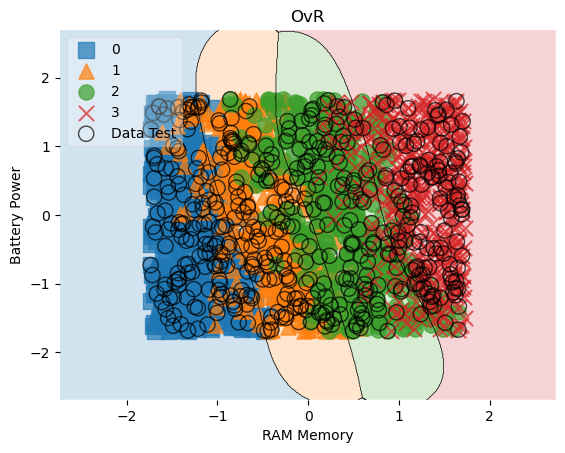

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

data=pd.read_csv("data_phones.csv")
ram=np.array([data['ram']])
ram=np.transpose(ram)
battery_power=np.array([data['battery_power']])
battery_power=np.transpose(battery_power)
price_range=np.array(data['price_range'])
price_range=np.transpose(price_range)

X = np.concatenate((ram,battery_power), axis=1, out=None)

X_train, X_test, y_train, y_test = train_test_split(X,price_range,random_state=20)
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
#this is the line we change
clf=OneVsRestClassifier(SVC(gamma="auto", random_state=42))
clf.fit(X_train_std,y_train)
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

#Getting a better graphic output

scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Data Test', 'alpha': 0.7}
plot_decision_regions(X_combined_std,y_combined,clf,legend=2,X_highlight=X_test_std,scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.xlabel('RAM Memory')
plt.ylabel('Battery Power')
plt.title('OvR')
predicciones = clf.predict(X_test_std)
accuracy = accuracy_score(y_true = y_test, y_pred = predicciones, normalize = True)
accuracy=round(accuracy,2)
print("")
print(f"Test Accuracy is: {100*accuracy}%")


- Suppose now that you do not have the data labeling (ie, the price_range variable). Considering the ram and price variables, try to obtain the possible groupings of the set of all data using the K-means algorithm. What number of clusters should you determine?. Get also the solution for one more cluster. Compare the two results by looking at the corresponding graphs.


### K-means Clustering

It seems reasonable to set k = 4, since that is the number of labeled classes in the initial set.

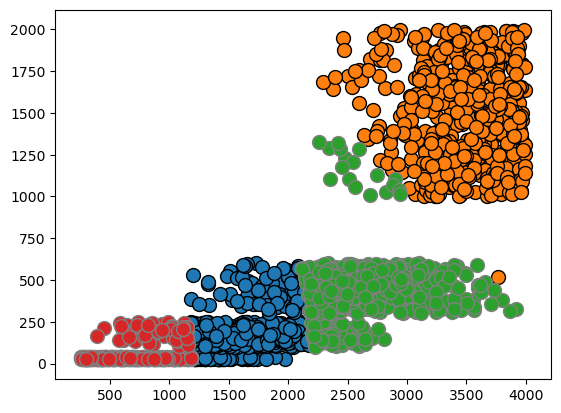

In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import mglearn

data=pd.read_csv("data_phones.csv")
ram=np.array([data['ram']])
ram=np.transpose(ram)
price=np.array([data['price']])
price=np.transpose(price)
X = np.concatenate((ram,price), axis=1, out=None)
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers="o")


It looks like the output is very reasonable, although there are "strange" points, such as those of cluster 3 (red) that are in the grouping of cluster 4, and a point of 4 that should belong to 3 (bottom right).


- For k = 5 

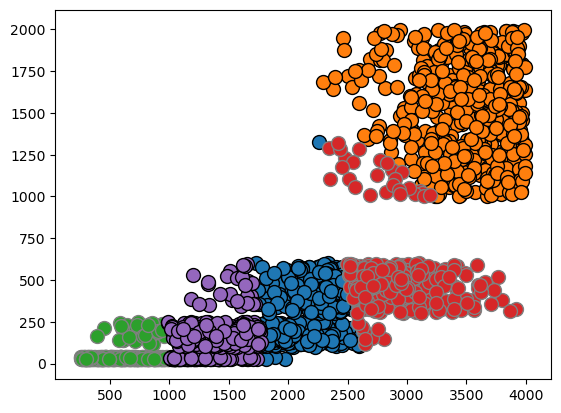

In [14]:
data=pd.read_csv("data_phones.csv")
ram=np.array([data['ram']])
ram=np.transpose(ram)
price=np.array([data['price']])
price=np.transpose(price)
X = np.concatenate((ram,price), axis=1, out=None)
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers="o")

The new cluster is obtained as a split of clusters 2 and 3, and is created between the values 1000 and 2500 MB approximately, in a consistent manner. However, the problem of the last cluster is still present (middle part of the graph, on the right: points from cluster 4 that are in cluster 5). We verified that, in effect, the algorithm does not work well when there are points that are atypical.

### DBSCAN

Now obtain the clusters using the DBSCAN method and, if possible, with the HDBSCAN method. For the DBSCAN method, investigate a possible epsilon value that provides a reasonable clustering for you, and for HDBSCAN, use the defaults.

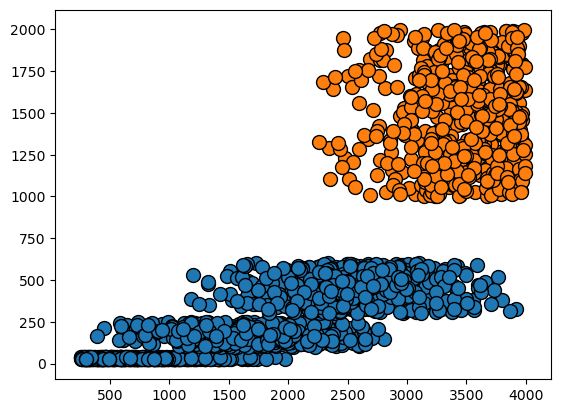

In [15]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=155,min_samples=1)
dbscan.fit(X)
mglearn.discrete_scatter(X[:,0],X[:,1],dbscan.labels_,markers="o")


In this case, two clusters are obtained, as something derived from the fact that there is no density of points in the region that separates them.
In any case, you can verify that, in effect, the algorithm does not work well when there are regions with low density, since with low or even average values of epsilon the groupings obtained contain very few elements and are no longer representative.


### HDBSCAN


- If we apply HDBSCAN


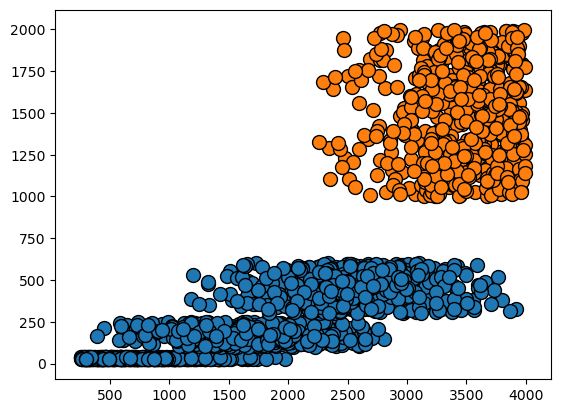

In [16]:
from hdbscan import HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=20,min_samples=10,alpha=5.5)
hdbscan.fit(X)
mglearn.discrete_scatter(X[:,0],X[:,1],hdbscan.labels_,markers="o")


The solution is similar to the previous one, with the advantage in this case of not having to adjust the epsilon value.

### Agglomerative Clustering

- Apply the clustering algorithm to the data set, considering the number of clusters that you think are most appropriate.

The code required for n_clusters = 4:

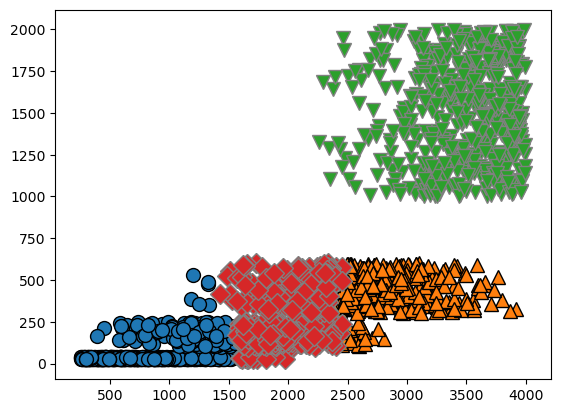

In [17]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=4)
agg.fit(X)
mglearn.discrete_scatter(X[:,0],X[:,1],agg.labels_)


This is what we expected

### PCA and dimensions 

- Now consider the entire dataset. Apply the PCA algorithm and obtain and represent the explained variance as a number of dimensions. How many dimensions will you require to safeguard a variance of around 95%?

Varianza de cada dimensión:
battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e+01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e+00
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
price            3.548895e+05
dtype: float64


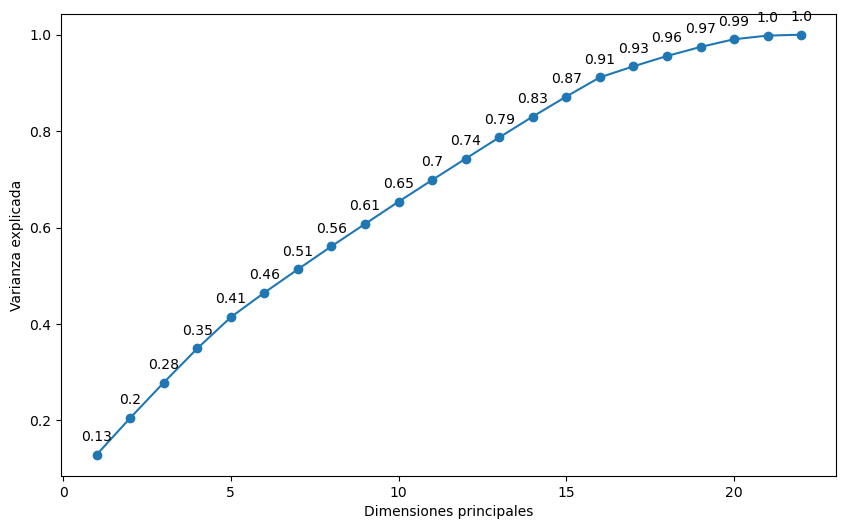

In [18]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("data_phones.csv")
print("Variance of each dimension:")
print(data.var(axis=0))
#We apply the PCA algorithm
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)
#We save the data of the PCA method applied in model_pca
modelo_pca = pca_pipe.named_steps['pca']
#We plot the the representation of the variances explained
cumsum = np.cumsum(modelo_pca.explained_variance_ratio_)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(np.arange(len(data.columns)) + 1,cumsum, marker = 'o')
plt.xlabel("Main Dimensions")
plt.ylabel("Explained Variance")
for x, y in zip(np.arange(len(data.columns)) + 1, cumsum):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')


We would need 17 dimensions to safeguard the explained variance.